In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.shape

(200, 5)

In [4]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
data.dtypes

,0
CustomerID,int64
Genre,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [7]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [8]:
data.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [9]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
data.mean(numeric_only=True).round()

,0
CustomerID,100.0
Age,39.0
Annual Income (k$),61.0
Spending Score (1-100),50.0


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Genre'] = le.fit_transform(data['Genre'])
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [15]:
from sklearn.model_selection import train_test_split
x = data[['Annual Income (k$)','Spending Score (1-100)']].values

In [16]:
from sklearn.cluster import KMeans

In [18]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

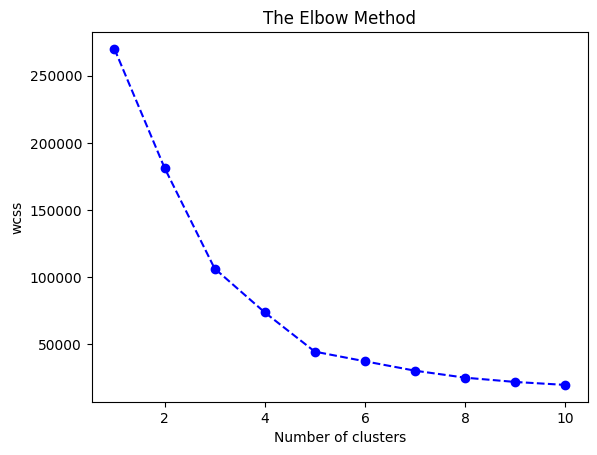

In [20]:
plt.plot(range(1,11),wcss,marker='o',linestyle='--',color = 'b')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

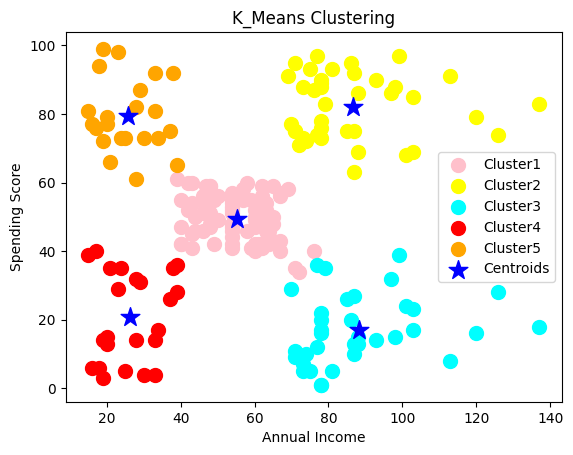

In [24]:
km = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1],s=100,c='pink',label='Cluster1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1],s=100,c='yellow',label='Cluster2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1],s=100,c='cyan',label='Cluster3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1],s=100,c='red',label='Cluster4')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1],s=100,c='orange',label='Cluster5')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=200, marker='*', c='blue',label='Centroids')

plt.title('K_Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3)
y_means = ac.fit_predict(x)

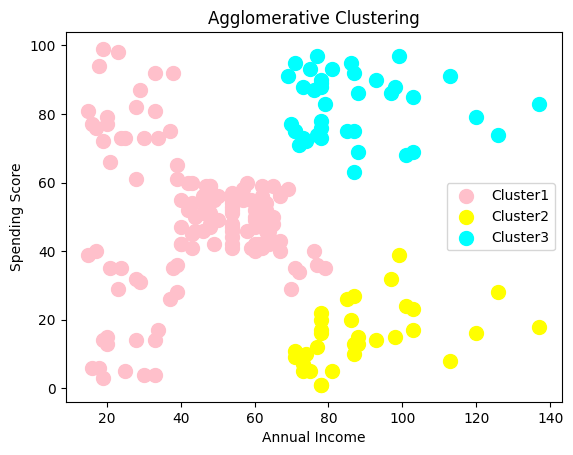

In [26]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1],s=100,c='pink',label='Cluster1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1],s=100,c='yellow',label='Cluster2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1],s=100,c='cyan',label='Cluster3')

plt.title('Agglomerative Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

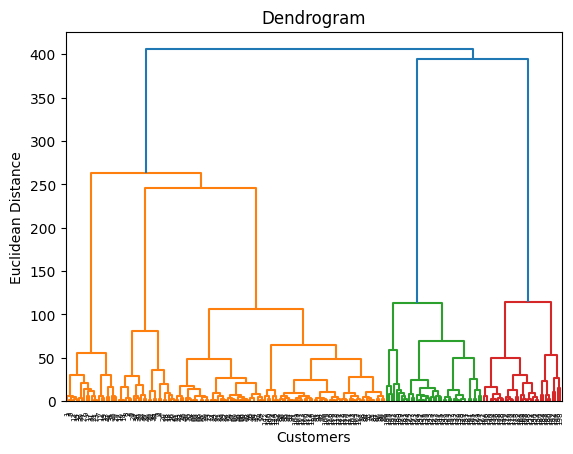

In [27]:
from scipy.cluster import hierarchy
dendrogram = hierarchy.dendrogram(hierarchy.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()